In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [3]:
from utils.dataset_metadata import DatasetMetadata

In [5]:
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/final_cholecinstanceseg'
dataset_name = 'cholecinstanceseg'
dataset_style = "dataset_split"

In [6]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                        dataset_name=dataset_name,
                        dataset_folder_style=dataset_style)
                

all sequences can be found


In [7]:
dataset_metadata = dataset.get_dataset_metadata()

In [8]:
from dataset_analysis_scripts.count_files import count_sizes_in_my_dataset

In [9]:
total_count = count_sizes_in_my_dataset(dataset_metadata)
print(f"Total count images in the dataset: {total_count}")


Entering base data structure
   Entering sub-dictionary key 'test'
      size of seq 'VID07_t80_sparse': 152
      size of seq 'VID09_seg8k': 240
      size of seq 'VID14_t50_full': 1709
      size of seq 'VID15_t50_full': 2059
      size of seq 'VID16_t80_sparse': 99
      size of seq 'VID20_seg8k': 160
      size of seq 'VID21_t80_sparse': 59
      size of seq 'VID22_t50_full': 1533
      size of seq 'VID24_seg8k': 960
      size of seq 'VID29_t50_full': 2351
      size of seq 'VID33_t80_sparse': 59
      size of seq 'VID38_t80_sparse': 103
      size of seq 'VID41_t80_sparse': 104
      size of seq 'VID45_t80_sparse': 113
      size of seq 'VID53_t80_sparse': 110
      size of seq 'VID55_seg8k': 240
      size of seq 'VID58_t80_sparse': 200
      size of seq 'VID61_t80_sparse': 147
      size of seq 'VID64_t80_sparse': 80
      size of seq 'VID69_t80_sparse': 153
      size of seq 'VID72_t80_sparse': 104
      size of seq 'VID77_t80_sparse': 84
   Total count in sub-dictionary at ke

### Counting frequency in an image

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append("..")

In [12]:
from utils.dataset_metadata import DatasetMetadata

In [15]:
# path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v1_during_quality_control'
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/final_cholecinstanceseg'
dataset_name = 'cholecseginstance'
dataset_style = "dataset_split"

In [16]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                                          dataset_name=dataset_name,
                                          dataset_folder_style=dataset_style)
                

all sequences can be found


In [17]:
dataset_metadata = dataset.get_dataset_metadata()

In [19]:
from static_variables.dataset_variables import CholecInstanceSegVariables

instrument_id_to_instrument_class_dict = CholecInstanceSegVariables.instrument_id_to_instrument_class_dict

class_names = list(instrument_id_to_instrument_class_dict.values())

## Testing scripts

In [29]:
from dataset_analysis_scripts.dataset_counter import DatasetCounter

In [30]:
from static_variables.dataset_variables import CholecInstanceSegVariables
instrument_id_to_instrument_class_dict = CholecInstanceSegVariables.instrument_id_to_instrument_class_dict
class_names = list(instrument_id_to_instrument_class_dict.values())

path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/final_cholecinstanceseg'
# path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/cholecseg8k_instance_redo'
dataset_name = 'cholec_instance_seg'
dataset_style = "dataset_split"


In [31]:
counter_for_cholec_instance_seg =  DatasetCounter(
    path_to_dataset=path_to_dataset,
    dataset_name = dataset_name,
    dataset_style=dataset_style,    
    class_names = class_names,
    )

all sequences can be found


In [112]:
dataset_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='dataset')

In [113]:
dataset_class_frequency

{'grasper': 38144,
 'hook': 19282,
 'irrigator': 2420,
 'clipper': 1324,
 'bipolar': 2558,
 'scissors': 712,
 'snare': 43}

In [115]:
sum(dataset_class_frequency.values())

64483

## plotting class frequency in dataset plot

### Plot as a pie chart

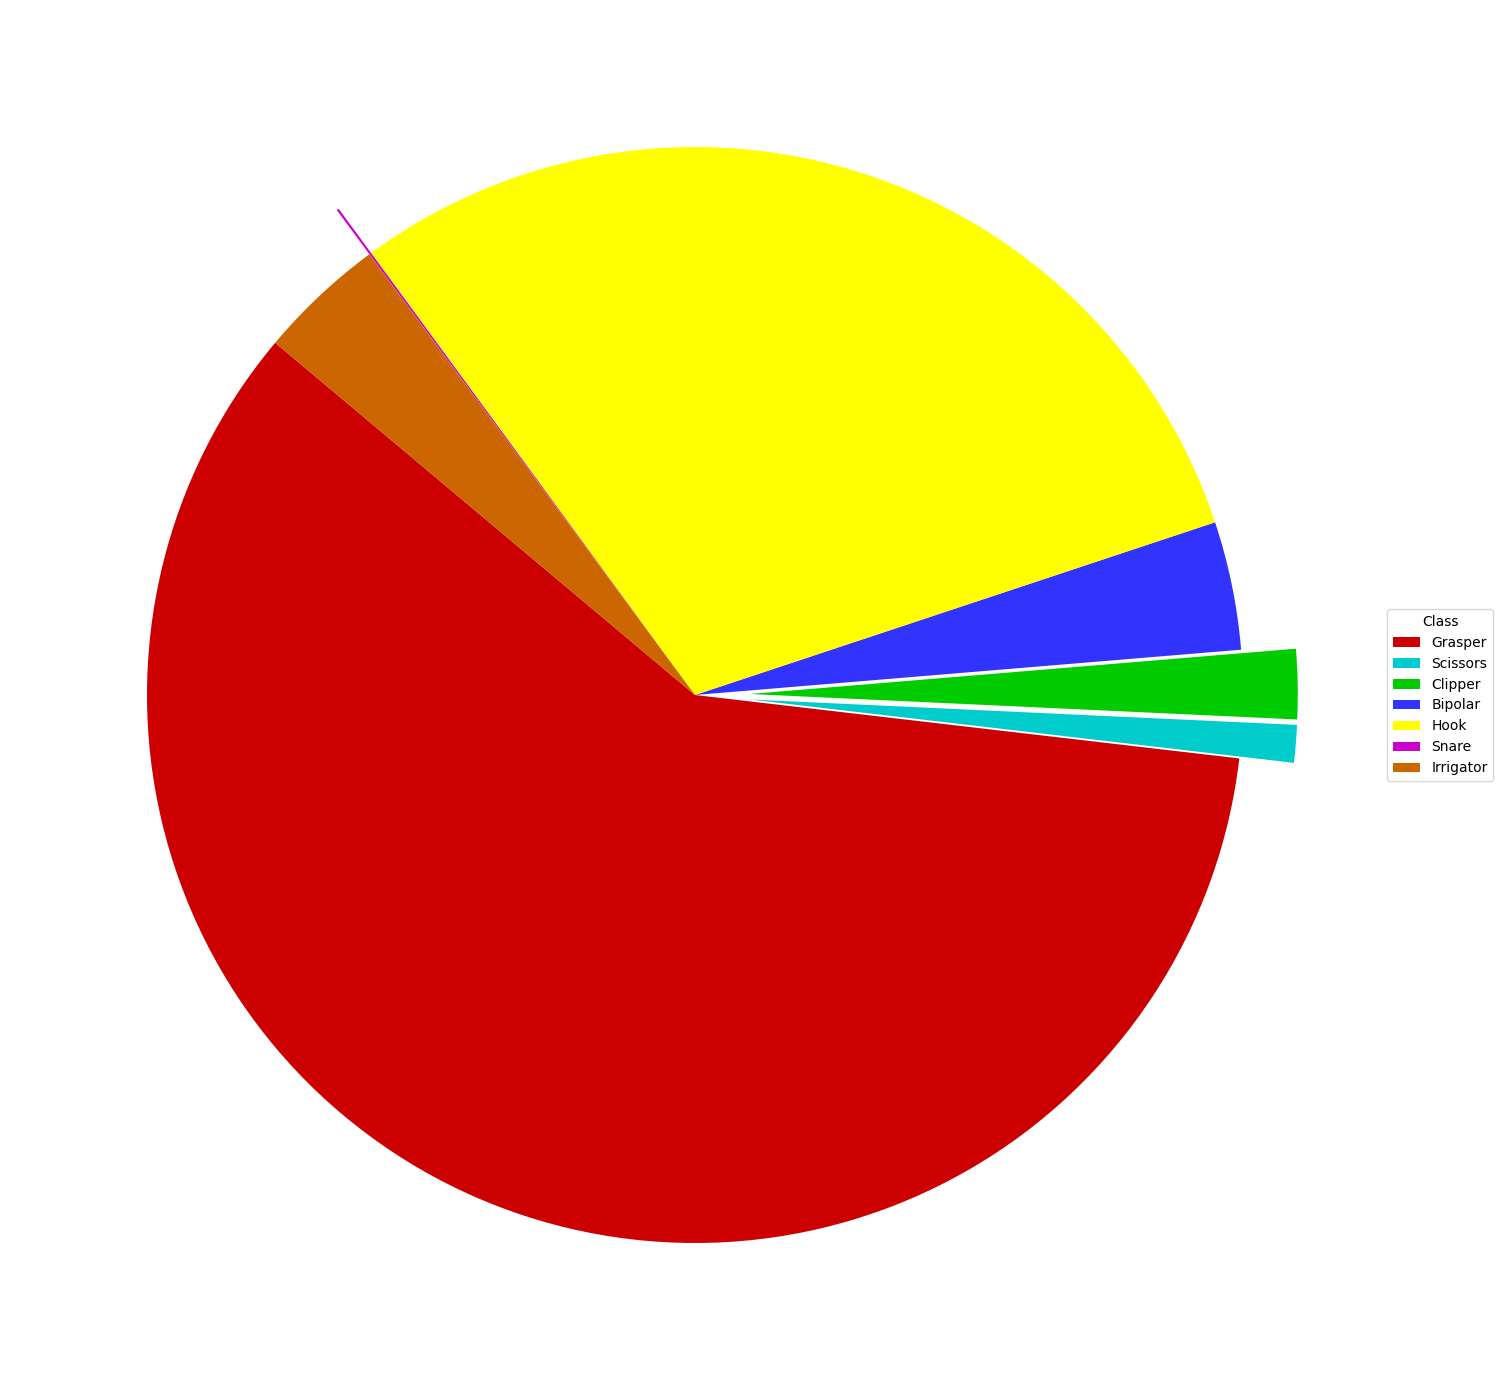

In [114]:
import matplotlib.pyplot as plt

# Data for the instruments
instrument_data = {
    'Grasper': 38144,
    'Scissors': 712,
    'Clipper': 1324,
    'Bipolar': 2437,
    'Hook': 19282,
    'Snare': 43,
    'Irrigator': 2420,
}

# Extracting labels and values
labels = list(instrument_data.keys())
sizes = list(instrument_data.values())

# Specifying colors for each slice
colors = ['#CC0000', '#00CCCC', '#00CC00','#3333FF', '#FFFF00','#CC00CC', '#CC6600']

explode = [0.1 if size < 2000 else 0 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(19, 14))
wedges, texts = plt.pie(sizes,  colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

for i, wedge in enumerate(wedges):
        wedge.set_linewidth(0)  # Example of setting thicker line for specific slices


plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to minimize space around the pie chart
plt.tight_layout()

# Displaying the chart
plt.show()


In [111]:
dataset_class_frequency

{'grasper': 38144,
 'hook': 19282,
 'irrigator': 2420,
 'clipper': 1324,
 'bipolar': 2558,
 'scissors': 712,
 'snare': 43}

In [82]:
sum(dataset_class_frequency.values())

64483

In [83]:
dataset_sequence_instance_frequency = counter_for_cholec_instance_seg.count_instance_frequency(aggregation_level='image')

In [89]:
frequency = {}
for count in dataset_sequence_instance_frequency.values():
    frequency[count] = frequency.get(count, 0) + 1

In [90]:
frequency

{0: 4914, 1: 14885, 2: 16805, 3: 5328, 4: 1}

In [117]:
sum(frequency.values())

41933

### plot as a pie chart

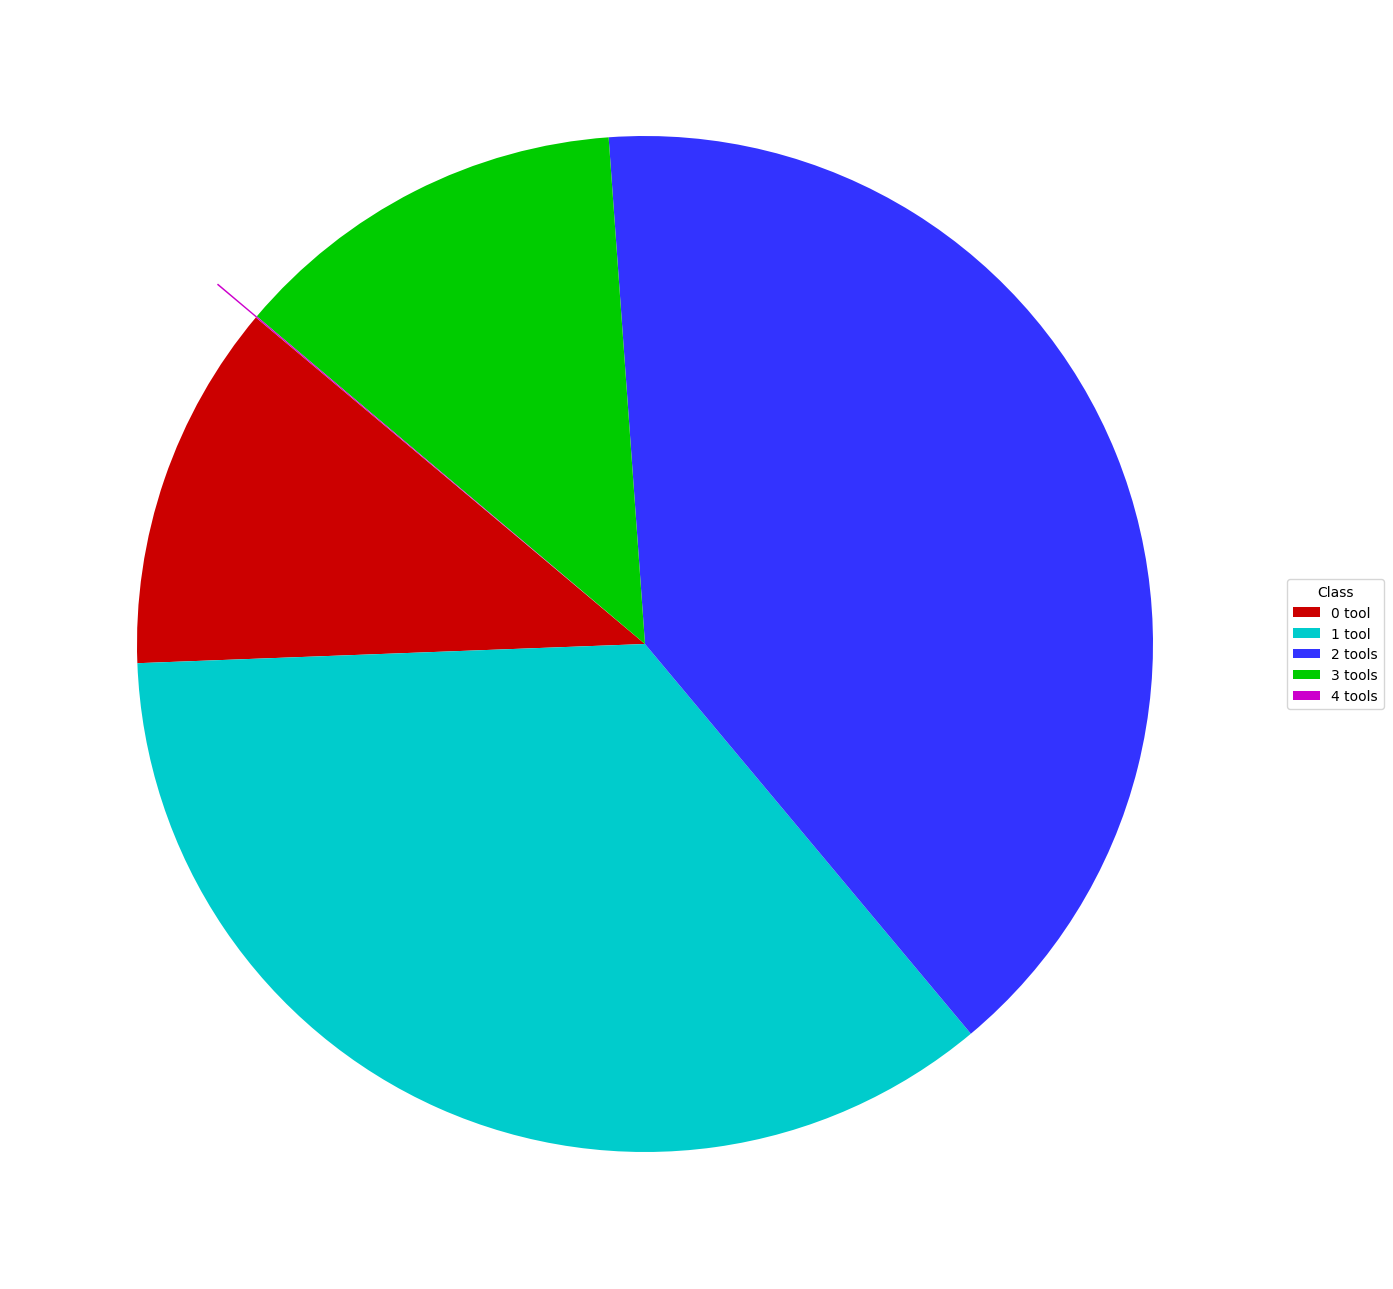

In [109]:
import matplotlib.pyplot as plt

# Data for the instruments
instrument_data = {
    '0 tool': 4914,
    '1 tool': 14885,
    '2 tools': 16805,
    '3 tools': 5328,
    '4 tools': 20,
}

# Extracting labels and values
labels = list(instrument_data.keys())
sizes = list(instrument_data.values())

# Specifying colors for each slice
colors = ['#CC0000', '#00CCCC', '#3333FF', '#00CC00', '#CC00CC']
# '#CC00CC', '#CC6600'

explode = [0.1 if size < 2000 else 0 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(19, 13))
wedges, texts = plt.pie(sizes,  colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

for i, wedge in enumerate(wedges):
        wedge.set_linewidth(0)  # Example of setting thicker line for specific slices


plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to minimize space around the pie chart
plt.tight_layout()

# Displaying the chart
plt.show()


In [118]:
# import matplotlib.pyplot as plt
# import numpy as np


# # Calculate frequency of each instance count
# frequency = {}
# for count in dataset_sequence_instance_frequency.values():
#     frequency[count] = frequency.get(count, 0) + 1

# # Create lists of instance counts and their frequencies
# instance_count_values = list(frequency.keys())
# instance_frequency_values = list(frequency.values())

# # Define colors for each instance count
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink']

# # Plotting the instance frequency chart with different colors for each bar
# plt.figure(figsize=(10, 6))
# bars = plt.bar(instance_count_values, instance_frequency_values)

# # Assigning colors to bars
# for i, bar in enumerate(bars):
#     bar.set_color(colors[i % len(colors)])

# # Adding labels and title
# plt.xlabel('Instance Count')
# plt.ylabel('Images')

# # Displaying the plot
# plt.show()


## Sanity Checks

In [94]:
instances_with_4_or_more_instruments_dict = {k: v for k, v in dataset_sequence_instance_frequency.items() if v == 4}

In [95]:
instances_with_4_or_more_instruments_names = list(instances_with_4_or_more_instruments_dict.keys())

In [96]:
instances_with_4_or_more_instruments_names

['t50_VID18_001284.json']

In [48]:
# ann_path  = f'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v1_during_quality_control/test/VID15_t50_full/ann_dir/t50_VID15_001569.json' 

In [39]:
# instances_with_4_or_more_instruments_path = []
# for ann_name in instances_with_4_or_more_instruments_names:     
#         dataset_seq_dir = get_seq_folder_from_ann_name(path_to_dataset,
#                                 ann_name)
#         # print(dataset_seq_dir)
#         dataset_seq_ann_dir = os.path.join(dataset_seq_dir, 'ann_dir')
#         ann_path = os.path.join(dataset_seq_ann_dir, ann_name)
        
#         instances_with_4_or_more_instruments_path.append(ann_path)

In [26]:
#  instances_with_4_or_more_instruments_path

## Plot ratio of each of the instruments in a sequence.  

We want to do it per partition. We want to plot how many instruments per partition. To show that we would be partial if we dont run a sequence

In [5]:
dataset_sequence_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='sequence_and_image')

NameError: name 'counter_for_cholec_instance_seg' is not defined

## Plot instances per sequence per partition

In [119]:
dataset_sequence_instance_frequency = counter_for_cholec_instance_seg.count_instance_frequency(aggregation_level='sequence_and_image')

In [120]:
dataset_sequence_instance_frequency

{'VID07_t80_sparse': {'t80_VID07_000000.json': 0,
  't80_VID07_000030.json': 1,
  't80_VID07_000060.json': 2,
  't80_VID07_000090.json': 2,
  't80_VID07_000120.json': 2,
  't80_VID07_000150.json': 2,
  't80_VID07_000180.json': 2,
  't80_VID07_000210.json': 2,
  't80_VID07_000240.json': 2,
  't80_VID07_000270.json': 2,
  't80_VID07_000300.json': 3,
  't80_VID07_000330.json': 2,
  't80_VID07_000360.json': 2,
  't80_VID07_000390.json': 1,
  't80_VID07_000420.json': 1,
  't80_VID07_000450.json': 1,
  't80_VID07_000480.json': 1,
  't80_VID07_000510.json': 1,
  't80_VID07_000540.json': 1,
  't80_VID07_000570.json': 2,
  't80_VID07_000600.json': 2,
  't80_VID07_000630.json': 1,
  't80_VID07_000660.json': 2,
  't80_VID07_000690.json': 2,
  't80_VID07_000720.json': 0,
  't80_VID07_000750.json': 1,
  't80_VID07_000780.json': 2,
  't80_VID07_000810.json': 1,
  't80_VID07_000840.json': 2,
  't80_VID07_000870.json': 1,
  't80_VID07_000900.json': 1,
  't80_VID07_000930.json': 2,
  't80_VID07_000960.

In [58]:
dataset_partition_sequence_instance_frequency =  {
    'seg8k' : {},
    'full': {},
    'sparse': {}
}

for seq in dataset_sequence_instance_frequency.keys():
    if seq[-5:] == 'seg8k':
        dataset_partition_sequence_instance_frequency['seg8k'][seq] = dataset_sequence_instance_frequency[seq]
        
    elif seq[-4:] == 'full': 
        dataset_partition_sequence_instance_frequency['full'][seq] = dataset_sequence_instance_frequency[seq]
        
    elif seq[-6:] == 'sparse':
        dataset_partition_sequence_instance_frequency['sparse'][seq] = dataset_sequence_instance_frequency[seq]  
           
    

In [60]:
dataset_partition_sequence_instance_frequency

{'seg8k': {'VID09_seg8k': {'seg8k_video09_000832.json': 0,
   'seg8k_video09_000833.json': 0,
   'seg8k_video09_000834.json': 0,
   'seg8k_video09_000835.json': 0,
   'seg8k_video09_000836.json': 0,
   'seg8k_video09_000837.json': 0,
   'seg8k_video09_000838.json': 0,
   'seg8k_video09_000839.json': 0,
   'seg8k_video09_000840.json': 0,
   'seg8k_video09_000841.json': 0,
   'seg8k_video09_000842.json': 0,
   'seg8k_video09_000843.json': 0,
   'seg8k_video09_000844.json': 0,
   'seg8k_video09_000845.json': 0,
   'seg8k_video09_000846.json': 0,
   'seg8k_video09_000847.json': 0,
   'seg8k_video09_000848.json': 0,
   'seg8k_video09_000849.json': 0,
   'seg8k_video09_000850.json': 0,
   'seg8k_video09_000851.json': 0,
   'seg8k_video09_000852.json': 0,
   'seg8k_video09_000853.json': 0,
   'seg8k_video09_000854.json': 0,
   'seg8k_video09_000855.json': 0,
   'seg8k_video09_000856.json': 0,
   'seg8k_video09_000857.json': 0,
   'seg8k_video09_000858.json': 0,
   'seg8k_video09_000859.json':

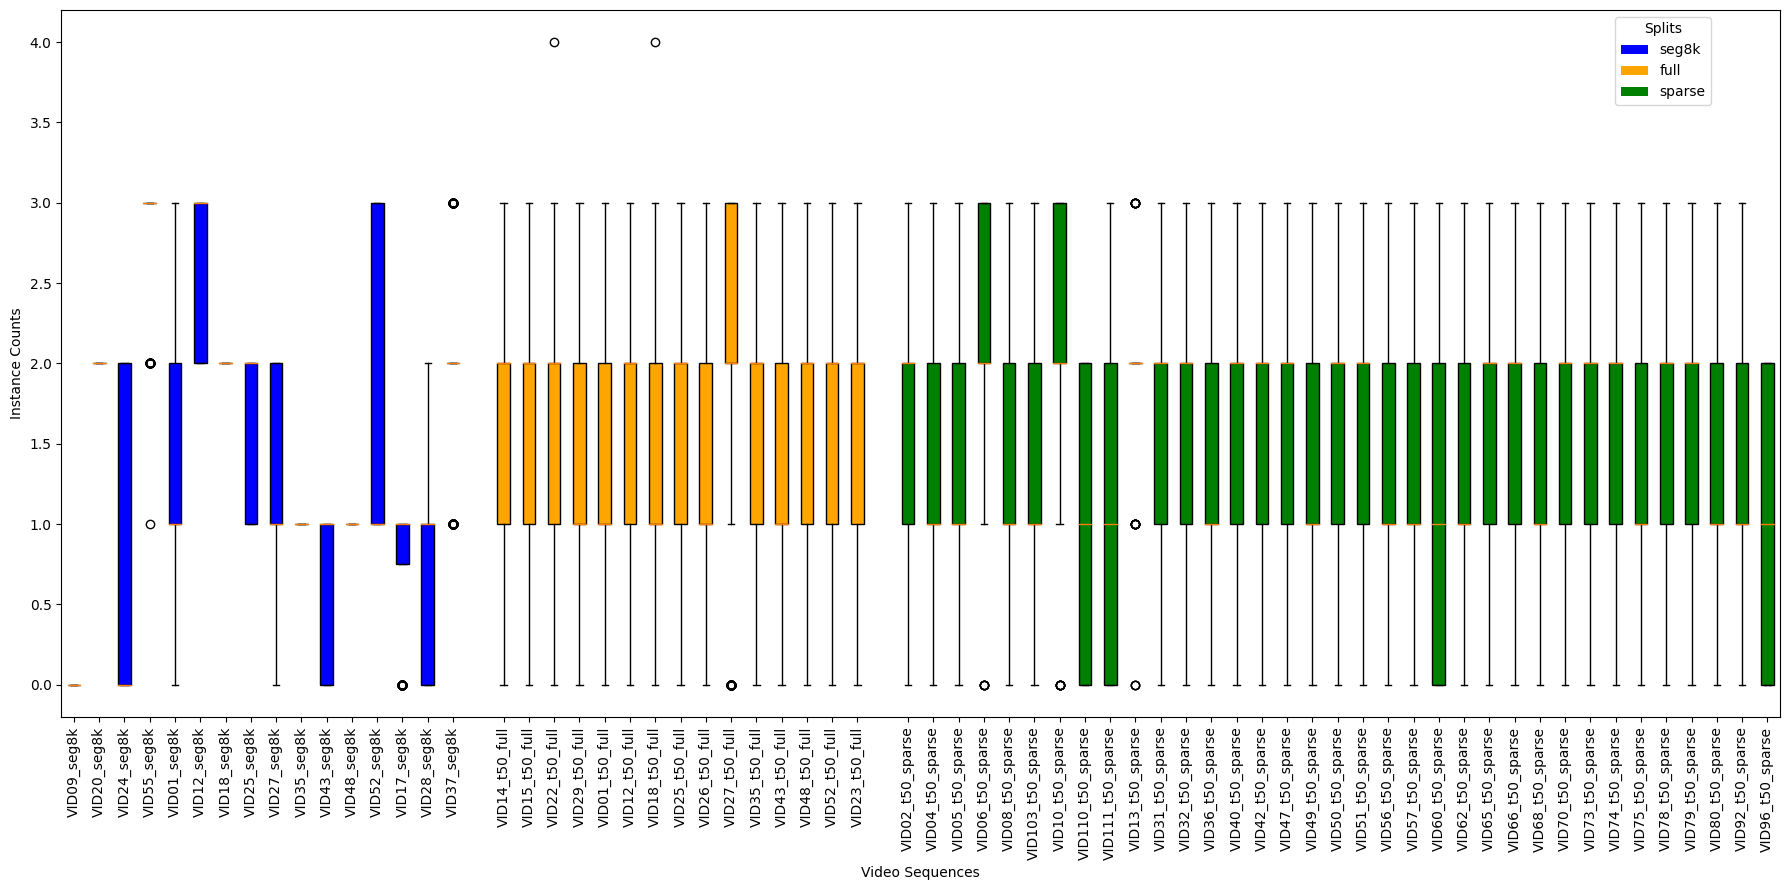

: 

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Given dataset
# instance_counts = {
#     'train': {
#         'VID09_seg8k': {
#             'seg8k_video09_000832.json': 0,
#             'seg8k_video09_000833.json': 1,
#             'seg8k_video09_000834.json': 2,
#         },
#         'VID10_seg8k': {
#             'seg8k_video10_000001.json': 1,
#             'seg8k_video10_000002.json': 3,
#             'seg8k_video10_000003.json': 2,
#         },
#     },
#     'val': {
#         'VID01_full': {
#             'full_video01_000832.json': 0,
#             'full_video01_000833.json': 1,
#             'full_video01_000834.json': 2,
#         },
#         'VID03_full': {
#             'full_video03_000832.json': 0,
#             'full_video03_000833.json': 1,
#             'full_video03_000834.json': 2,
#         },
#     },
#     'test': {
#         'VID02_sparse': {
#             'sparse_video02_000832.json': 0,
#             'sparse_video02_000833.json': 1,
#             'sparse_video02_000834.json': 2,
#         }
#     }
# }

# Prepare data for plotting with spacing
data = []
labels = []
xticks = []
xticklabels = []
colors = []
color_map = {'seg8k': 'blue', 'full': 'orange', 'sparse': 'green'}

# Starting position for the first group on x-axis
current_position = 1

# Loop through each split and sequence to gather data
for split, sequences in dataset_partition_sequence_instance_frequency.items():
    for sequence_name, annotations in sequences.items():
        annotation_values = list(annotations.values())
        data.append(annotation_values)
        labels.append(sequence_name)
        colors.append(color_map[split])
        xticks.append(current_position)
        current_position += 1  # Move to the next position for the next sequence
    current_position += 1  # Additional space between splits

# Actual plotting
plt.figure(figsize=(18, 9))

# Create subplots for each group
parts = plt.boxplot(data, patch_artist=True, positions=xticks)

# Coloring each box
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)

# Set xticks and labels
plt.xticks(ticks=xticks, labels=labels, rotation=90)

# Adding legend for splits
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[split], label=split) for split in color_map]
plt.legend(handles=legend_elements, title="Splits", bbox_to_anchor=(0.9, 1), loc='upper left')

# Labeling
plt.xlabel('Video Sequences')
plt.ylabel('Instance Counts')
# plt.title('Instance Counts per Video Sequence by Split')
plt.tight_layout()  # Adjust layout to include the legend

# Show plot with adjusted xticks
plt.show()


## Count class fragments